# Project: Wrangling and Analyze Data

### Importing Useful Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### Data Information

>- data_1 = twitter_archive_enhanced.csv (which is already available for download)
>- data_2 = image_predictions.tsv (queried from the udacity server)
>- data_3 = twitter_data.json (scraped from twitter with twitter Api)

In [2]:
# Reading the downloaded data to the notebook
data_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [18]:
# downloading the data_2 programmatically from udacity server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# write the content of the response to an html file
file_name = 'image-predictions.tsv'
with open(file_name, mode='wb') as file:
    file.write(response.content)

In [3]:
# Reading the downloaded tsv file 
data_2 = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# importing my keys
import config

In [3]:
tweepy.__version__

'4.6.0'

In [6]:
# upgrading tweepy library to 4.6.0 to be able call Api v2 functions
!pip install tweepy==4.6.0

    100% |████████████████████████████████| 71kB 5.0MB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 14.0MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 11.8MB/s ta 0:00:01
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: oauthlib 2.0.6
    Uninstalling oauthlib-2.0.6:
      Successfully uninstalled oauthlib-2.0.6
  Found existing installation: requests-oauthlib 0.8.0
    Uninstalling requests-oauthlib-0.8.0:
      Successfully uninstalled requests-oauthlib-0.8.0
  Found existing installation: tweepy 3.5.0
    Uninstalling tweepy-3.5.0:
      Successfully uninstalled tweepy-3.5.0


In [3]:
import config

In [4]:
# authentication for API v1
auth = tweepy.OAuthHandler(config.api_key, config.api_key_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
# punch = api.user_timeline(screen_name='MobilePunch')
# # print(punch)
# print(len(punch))

20


In [5]:
# Creating the id list to be used in the api query
tweet_ids = data_1.tweet_id.values

In [6]:
dog_tweets = []

In [7]:
# parsing the tweet_ids to get data data for each id in the list
start = timer() 
for ids in tweet_ids:
 
    try:
        tweet = api.get_status(ids, tweet_mode='extended')
        tweet_dict = {
            "tweet_id":tweet.id, 
            "likes":tweet.favorite_count, 
            "retweet":tweet.retweet_count,
            "timestamp":str(tweet.created_at)
        }
        dog_tweets.append(tweet_dict)
        print('Sucess')
    except Exception as e:
        print("Fail")
        pass
end = timer()
print(end - start)                    

Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Fail
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Fail
Sucess
Sucess
Sucess
Sucess
Sucess
Fail
Sucess
Sucess
Fail
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Fail
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Fail
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Sucess
Suce

In [9]:
# saving json file to txt file with json dump
file_name = "tweet_json.txt"
with open(file_name, "w") as file:
    json.dump(dog_tweets, file)

In [4]:
# loading the json text file to a variable in the notebook
with open('tweet_json.txt') as f:
    tweet_data = json.load(f)

In [5]:
# Converting the json text file to pandas dataframe 
data_3 = pd.DataFrame(tweet_data)

In [15]:
data_3.to_csv('tweet_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [16]:
# Checking the top five rows of data 1
data_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
# Assessing data programmatically using .info
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
# Checking the null values in data_1
data_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
data_1.notnull().sum()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [29]:
data_1.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [15]:
# Visual assessment for data 2
data_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
# Programmatic assessment for data 2
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Visual assessment for data 3
data_3.head()

,likes,retweet,timestamp,tweet_id
0,33820,7009,2017-08-01 16:23:56,892420643555336193
1,29337,5302,2017-08-01 00:17:27,892177421306343426
2,22061,3481,2017-07-31 00:18:03,891815181378084864
3,36947,7227,2017-07-30 15:58:51,891689557279858688
4,35315,7763,2017-07-29 16:00:24,891327558926688256


In [18]:
# programmatic assessment for data 3
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
likes        2327 non-null int64
retweet      2327 non-null int64
timestamp    2327 non-null object
tweet_id     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Quality issues
1. The timestamp values needs to be in standard date format(+0000 should be removed)

2. Data type issue for the timestamp, should be in date datatype

3. The likes column name in data_3 should be renamed to no_of_likes

4. The retweet column name should be retweet_count instead of retweet in data_3 to be more descriptive

5. Names in column name in data_1 are in lower,sentence and upper case(all should be in sentence case)

6. Too much NaNs drop all columns with too many NaNs(retweeted_status_user_id, in_reply_to_user_id, retweeted_status_user_id should be dropped they have very few values in the entire dataset)
 
7. Some dog type name is in lower case,sentence case and upper case in data_2 p1 column

8. Some dog type name is in lower case,sentence case and upper case in data_2 p2 column

9. Some dog type name is in lower case,sentence case and upper case in data_2 p3 column (should be consistent through out)

### Tidiness issues
1. Create a new column and extract the tweet source from the html tag to the new column and drop the old source column 

2. Data_3 needs restructuring (tweet_id should be the first column follow by the tweet text)

3. Data_1 and data_3 should be one data table (add the retweet_count and no_of_likes to data_1)
4. Merge data_2 to the new data


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [6]:
# Make copies of original pieces of data
data_1_copy = data_1.copy()
data_2_copy = data_2.copy()
data_3_copy = data_3.copy()

### Issue #1: Tidiness Issue one 
Create a new column and extract the tweet source from the html tag to the new column and drop the old source column 

#### Define:Extract the tweet source values from the html tag to a new dataframe column called new_source and drop the source column using str.extract function and some regular expressions to criteria for extract

#### Code

In [7]:
# Using the str.extract with re to extract any word characters,spaces and other character in the main string in the source column 
# between character > and <
data_1_copy['new_source'] = data_1['source'].str.extract('(?:.*>)([a-zA-Z-\s]+)(?:.*<)')
data_1_copy.drop('source', axis=1, inplace=True)

#### Test

In [8]:
data_1_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone


### Issue #2: Quality Issue 1 
The timestamp values needs to be in standard date format(+0000 should be removed)

#### Define: Remove the +0000 in the timestamp values using string slicing method

#### Code

In [9]:
data_1_copy['timestamp'] = data_1['timestamp'].str[0:-5]

#### Test

In [10]:
data_1_copy['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

### Issue #3: Quality Issue 2 
Data type issue for the timestamp, should be in date datatype

#### **Define**:
Change the datatype of timestamp to date time 

#### Code

In [11]:
data_1_copy['timestamp'] = pd.to_datetime(data_1['timestamp'])

#### Test

In [12]:
data_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
new_source                    2356 non-null object
dtypes: datetime64[ns](1

### Issue #4 and #5:Quality Issue 3 and 4
The likes and retweet column name in data_3 should be renamed to no_of_likes and retweet_count to be more descriptive

### **Define**: Rename the column name for likes in data_3 to no_of_likes and retweet to retweet_count using .rename function

### **Code**

In [13]:
data_3_copy.rename({'likes':'no_of_likes', 'retweet':'retweet_count'}, axis=1, inplace=True)

### **Test**

In [14]:
data_3_copy.head()

,no_of_likes,retweet_count,timestamp,tweet_id
0,33820,7009,2017-08-01 16:23:56,892420643555336193
1,29337,5302,2017-08-01 00:17:27,892177421306343426
2,22061,3481,2017-07-31 00:18:03,891815181378084864
3,36947,7227,2017-07-30 15:58:51,891689557279858688
4,35315,7763,2017-07-29 16:00:24,891327558926688256


### Issue #6:Quality Issue 5
Names in column name in data_1 are in lower,sentence and upper case(all should be in sentence case)

### **Define** :
Change names in column name in data_1 are in sentence case using the .tittle function

### **Code** 


In [15]:
data_1_copy['name'] = data_1_copy['name'].str.title()

### **Test** 


In [16]:
data_1_copy['name'].head()

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

### **Issue** #7:Quality Issue 6
Too much NaNs drop all columns with too many NaNs(retweeted_status_user_id, in_reply_to_user_id, retweeted_status_user_id should be dropped they have very few values in the entire dataset)

### **Define**:
Drop the columns with too many NaNs (retweeted_status_user_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_status_id ) in data_1 using pandas drop function 


### **Code** 


In [17]:
data_1_copy.drop(columns = ['retweeted_status_user_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id'],  inplace=True)

### **Test** 


In [18]:
data_1_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_source
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone


### **Issue** #8, #9 and #10:Quality Issue 7, 8, 9
Some dog type name is in lower case,sentence case and upper case in data_2 p1,p2 and p3 column

### **Define**:
Change all the dog type names case in data_2 to title case for all the predictions columns 

### **Code** 

In [19]:
data_2_copy['p1'] = data_2_copy['p1'].str.title()
data_2_copy['p2'] = data_2_copy['p2'].str.title()
data_2_copy['p3'] = data_2_copy['p3'].str.title()

### **Test** 

In [20]:
data_2_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #11:Tidiness Issue 2
Data_3 needs restructuring (tweet_id should be the first column follow by the tweet text)

### **Define**:
Rearrange the columns indexes such that tweet_id will be in he first column using iloc

### **Code**:


In [21]:
data_3_copy = data_3_copy.iloc[:, [3, 2, 1, 0]]

### **Test**:


In [22]:
data_3_copy.head()

,tweet_id,timestamp,retweet_count,no_of_likes
0,892420643555336193,2017-08-01 16:23:56,7009,33820
1,892177421306343426,2017-08-01 00:17:27,5302,29337
2,891815181378084864,2017-07-31 00:18:03,3481,22061
3,891689557279858688,2017-07-30 15:58:51,7227,36947
4,891327558926688256,2017-07-29 16:00:24,7763,35315


### Issue #12:Tidiness Issue 3
Data_1 and data_2 should be one data table and merge with data_2 useful criterials (add the retweet_count and no_of_likes to data_1)

### **Define**: 
join the no_of_likes and retweet_count columns in data_2_copy to data_1_copy to make new cleaned data using pd.merge function

### **Code** 

In [23]:
metrics = data_3_copy[['tweet_id', 'no_of_likes', 'retweet_count']]
cleaned_archive_tweets = pd.merge(data_1_copy, metrics, on = 'tweet_id',  how='inner')

data_1 and data_2 copy was merged in the above code using inner join to avoid creating new nans and dirty the new cleaned datas because the rows of the two datasets are not equal

### **Test** 

In [24]:
cleaned_archive_tweets.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_source,no_of_likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone,33820,7009
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone,29337,5302
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone,22061,3481
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone,36947,7227
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone,35315,7763


In [25]:
cleaned_archive_tweets.shape

(2327, 14)

### Issue #13:Tidiness Issue 3
subset the data_2_copy with only the first predictions, image url and tweet_id and merge it to the new cleaned archive data

### **Define**:
Join column p1,tweet_id and img_url in table 2 to the new cleaned archive dataset using the inner join 

### Code

In [26]:
pred = data_2_copy[['tweet_id', 'jpg_url', 'p1']]
master_archive_cleaned = pd.merge(cleaned_archive_tweets, pred, on = 'tweet_id', how='inner')

### Test

In [27]:
master_archive_cleaned.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_source,no_of_likes,retweet_count,jpg_url,p1
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Twitter for iPhone,33820,7009,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Twitter for iPhone,29337,5302,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Twitter for iPhone,22061,3481,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Twitter for iPhone,36947,7227,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_Towel
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Twitter for iPhone,35315,7763,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [28]:
master_archive_cleaned.to_csv('twitter_archive_master.csv')

In [3]:
master_archive_cleaned = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which dog specie has the highest prediction count in prediction 1

2. Which dog tweet has the highest count of retweet

3. The most frequent source of dog's tweet

### First Insight: Which dog specie has the highest prediction count in the first prediction

In [31]:
master_archive_cleaned['p1'].describe()

count                 2057
unique                 377
top       Golden_Retriever
freq                   150
Name: p1, dtype: object

The result above shows the brief summary of prediction column in the cleaned dataset, which reveals that dog specie with the highest prediction count in prediction 1 is Golden_Retriever with the prediction count of 150

### Second Insight: Which dog tweet has the highest count of retweet

In [32]:
master_archive_cleaned['retweet_count'].max()

70770

In [35]:
max_tweet_retweeted = master_archive_cleaned[master_archive_cleaned['retweet_count'] == 70770]

In [39]:
max_tweet_retweeted['text']

836    Here's a doggo realizing you can stand in a po...
Name: text, dtype: object

The results above reveals the dog tweets with the highest retweet count between 2015 to 2017 tweet datas in the dataset

### Third Insight: What is the most common source of dog's tweet between 2015 to 2017

In [4]:
master_archive_cleaned['new_source'].value_counts()

Twitter for iPhone    2017
Twitter Web Client      30
TweetDeck               10
Name: new_source, dtype: int64

### Visualization

In [2]:
import matplotlib.pyplot as plt

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

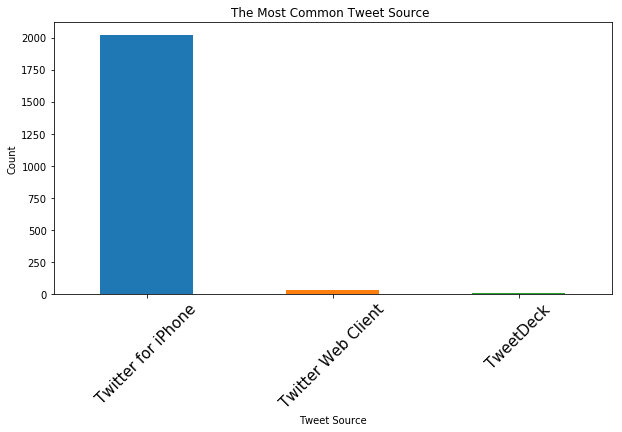

In [5]:
plt.figure(figsize=(10, 5))
master_archive_cleaned['new_source'].value_counts().plot(kind='bar');
plt.xlabel('Tweet Source')
plt.ylabel('Count')
plt.title('The Most Common Tweet Source ')
plt.xticks(rotation=45, fontsize=15)

The data visualization above shows the dogs tweets source by count